# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.1.1 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

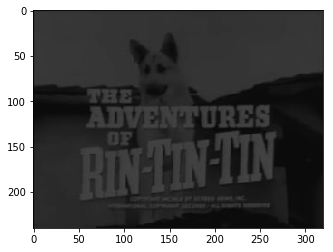

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

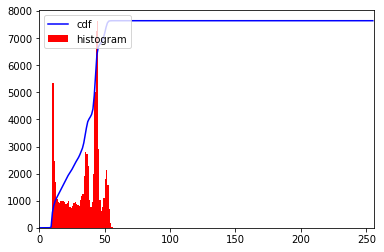

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [9]:
saida = np.zeros((240, 320), dtype=np.uint8)


In [10]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = ((rintin_gray[i][j]) - 8) * (255/50)

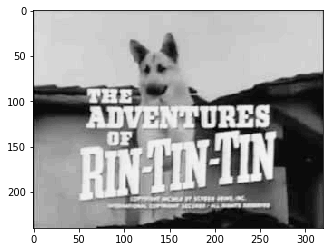

In [11]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

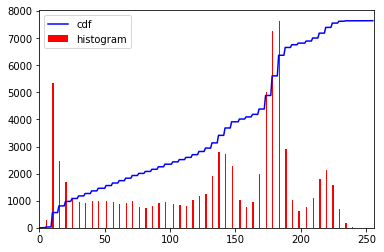

In [12]:
hist,bins = np.histogram(saida.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


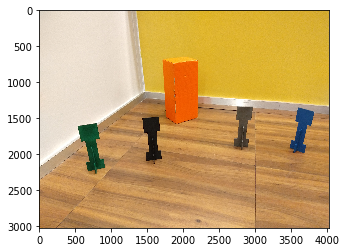

In [164]:
cena = cv2.imread("cena_canto_sala.jpg")
cena_rgb = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
plt.imshow(cena_rgb)
cena_nova = cena_rgb

In [165]:
for i in range(cena_rgb.shape[0]):
    for j in range(cena_rgb.shape[1]):
        if cena_rgb[i][j][0] > 210 and cena_rgb[i][j][2] < 15:
            cena_nova[i][j] = [255,255,255]
        elif cena_rgb[i][j][0] > 252 and cena_rgb[i][j][1] < 215:
            cena_nova[i][j] = [255,255,255]
        else:
            cena_nova[i][j] = [0,0,0]

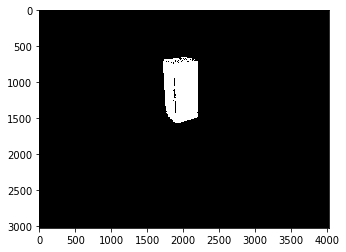

In [166]:
plt.imshow(cena_nova)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [167]:
hall = cv2.imread("hall_box_battery_atividade3.png")
hall_gray = cv2.cvtColor(hall, cv2.COLOR_BGR2GRAY)
new_hall = hall_gray.copy()
hall_gray

array([[122, 133, 127, ..., 129, 130, 129],
       [129, 127, 129, ..., 134, 126, 128],
       [132, 127, 124, ..., 128, 133, 130],
       ...,
       [ 90, 126, 141, ...,  72,  74,  56],
       [ 93, 123, 127, ...,  59,  53,  39],
       [ 91,  76,  82, ...,  33,  51,  61]], dtype=uint8)

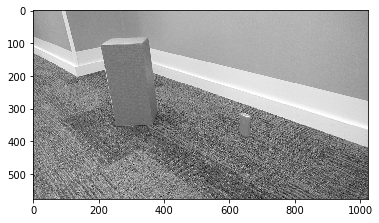

In [168]:
plt.imshow(hall_gray, cmap="Greys_r", vmin=0, vmax=255)

In [169]:
for i in range(hall_gray.shape[0]-1):
    for j in range(hall_gray.shape[1]-1):
        a = abs(int(hall_gray[i+1][j]) - int(hall_gray[i-1][j]))
        new_hall[i][j] = a

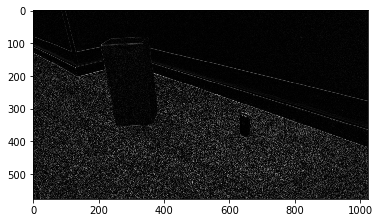

In [170]:
plt.imshow(new_hall, cmap="gray", vmin=0, vmax=255)